In [1]:
#Importing the basic packages for creating arrays
import pandas as pd
import numpy as np

#importing basic Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
dataset=pd.read_csv('Customers.csv')

### Apply K-means on the dataset in this link and visualize the clusters using matplotlib or seaborn.
Description of the dataset:
1)Customer_id
2)Age
3)Annual Income 
4)Spending score

Our goal is to cluster our customers into buying groups based off of their Annual Income and Spending Scores


In [3]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Cleaning the dataset

In [4]:
#Finding Null Values
dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#Datatypes of dataframe
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
#Importing packages for Converting Categorical data into Numerical

#Label Encoding is used for conversion

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#Converting Categorical to Numerical
dataset['Gender']=le.fit_transform(dataset['Gender']) #Fit label encoder and return encoded labels

In [7]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [8]:
#Dropping Column which is not required
X=dataset.drop("CustomerID",axis=1)

### Report which K is the best using the elbow method.

In [9]:
#importing Kmeans package
from sklearn.cluster import KMeans

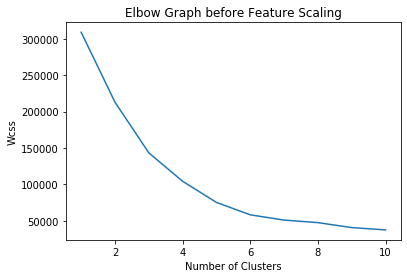

In [10]:
#Finding the K Value in Kmeans(i.e: no. of clusters)
wcss = []  
for i in range(1,11): #checking the number of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i,max_iter=300,random_state=0) # Maximum Iteration=300, random state=0
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph before Feature Scaling')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

### Evaluate with silhouette score or other scores relevant for unsupervised approaches

In [11]:
nclusters = 3 # this is the k in kmeans (taken the optimal number of clusters from the elbow graph)
km = KMeans(n_clusters=nclusters, random_state=0) #Determines random number generation for centroid initialization
km.fit(X) #Compute k-means clustering
y_cluster_kmeans = km.predict(X) #Predict the closest cluster each sample in X belongs to

#Importing package for silhouette score
from sklearn import metrics
Score_before_Feature_Scaling = metrics.silhouette_score(X, y_cluster_kmeans) # calculating the silhouette_score
Score_before_Feature_Scaling

0.383798873822341

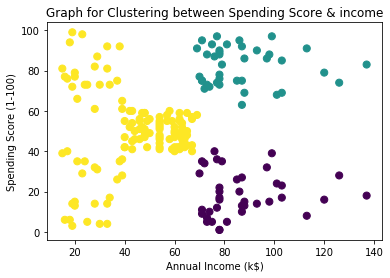

In [12]:
#Plotting the graph for Modeling clustering
plt.scatter(X.iloc[:,2],X.iloc[:,3],c=y_cluster_kmeans,s=50,cmap='viridis')
plt.title("Graph for Clustering between Spending Score & income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

### Can you interpret the clustering result that you have visualized